# Part 2

In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '..'))

In [2]:
import pm4py
import pandas as pd

from process_viewer import BPMNTopologicalAbstractor, FlowProcessViewer, name_subprocesses_with_gpt

OPENAI_API_KEY loaded: True
OpenAI client created: True


In [ ]:
# Load your log here (using the repairExample from your code)
df = pd.read_csv('../data/repairExample.csv')
df['Start'] = pd.to_datetime(df['Start Timestamp'])
df = pm4py.format_dataframe(df, case_id='Case ID', activity_key='Activity', timestamp_key='Start')
event_log = pm4py.convert_to_event_log(df)

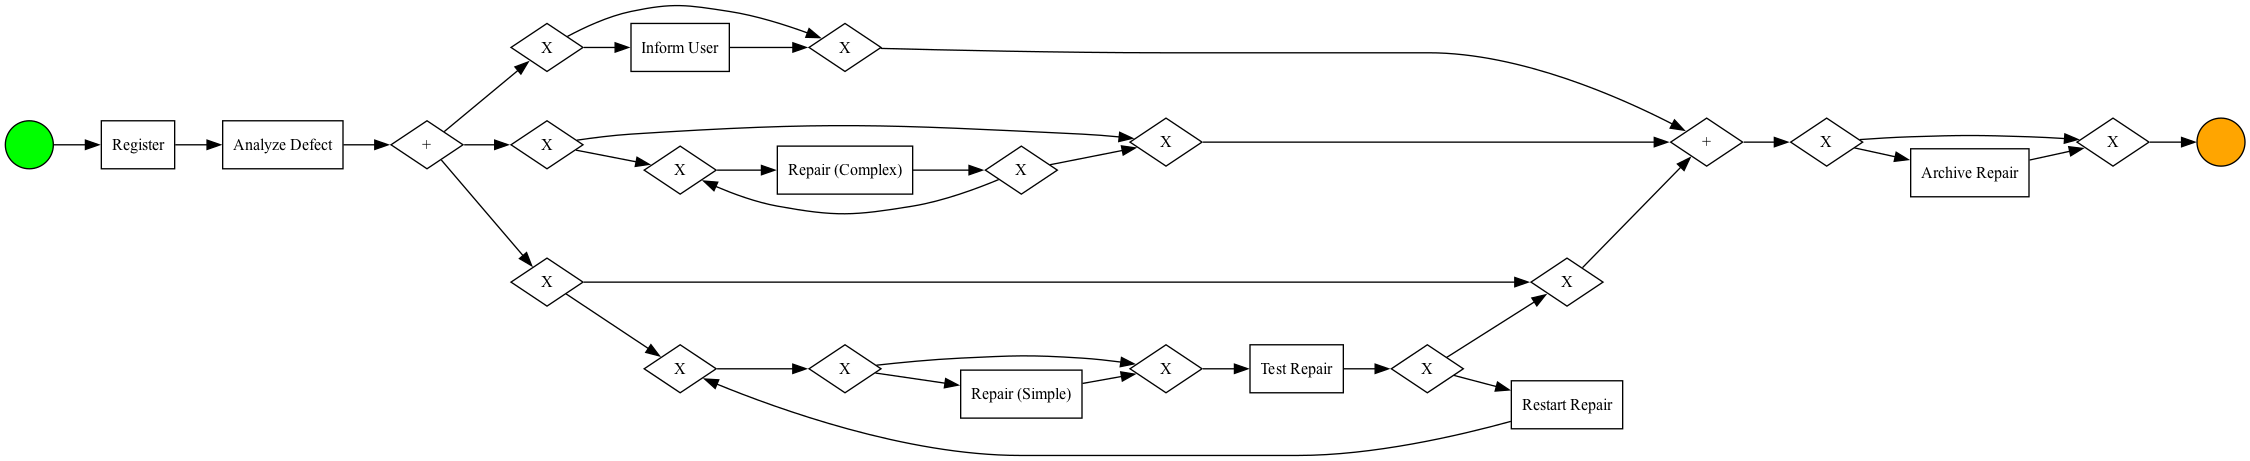

In [4]:
bpmn_model = pm4py.discover_bpmn_inductive(event_log)

pm4py.view_bpmn(bpmn_model)

In [ ]:
viewer = FlowProcessViewer(
    bpmn_model,
    abstractor_cls=BPMNTopologicalAbstractor,
    labeler=name_subprocesses_with_gpt,
)

In [9]:
viewer.show()

In [7]:
import os
from datetime import datetime

run_stamp = datetime.now().strftime("%Y%m%d_%H%M%S")
out_dir = os.path.join("images_bpmn", run_stamp)
os.makedirs(out_dir, exist_ok=True)

image_paths = []
for i, graph in enumerate(viewer.steps):
    dot = viewer.render_graph(graph)
    base = os.path.join(out_dir, f"zoom{i}")
    png_path = dot.render(filename=base, format="png", cleanup=True)
    image_paths.append(png_path)

# Create GIF from rendered PNGs with a uniform canvas size
gif_path = os.path.join(out_dir, "zoom.gif")
try:
    from PIL import Image
    frames = [Image.open(p).convert("RGBA") for p in image_paths]
    if frames:
        max_w = max(im.width for im in frames)
        max_h = max(im.height for im in frames)
        padded = []
        for im in frames:
            canvas = Image.new("RGBA", (max_w, max_h), (255, 255, 255, 255))
            x = (max_w - im.width) // 2
            y = (max_h - im.height) // 2
            canvas.paste(im, (x, y))
            padded.append(canvas)
        padded[0].save(gif_path, save_all=True, append_images=padded[1:], duration=900, loop=0)
        print(f"Saved GIF to {gif_path}")
except Exception as e:
    print("GIF creation failed; install Pillow to normalize frame size.")
    print(f"Error: {e}")

print(f"Saved {len(image_paths)} images to {out_dir}")


Saved GIF to images_bpmn/20260124_164608/zoom.gif
Saved 24 images to images_bpmn/20260124_164608
